# Elastic Net Regression


[*********************100%***********************]  1 of 1 completed
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3795669885997026e-05, tolerance: 1.0839599415055822e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.167278776021077e-05, tolerance: 1.0839599415055822e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\P

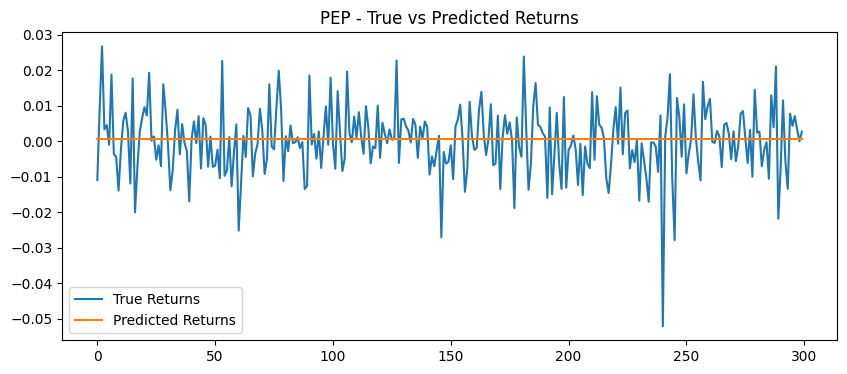

[*********************100%***********************]  1 of 1 completed
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001795887937061813, tolerance: 4.5710010679388446e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025444623224129548, tolerance: 4.5710010679388446e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

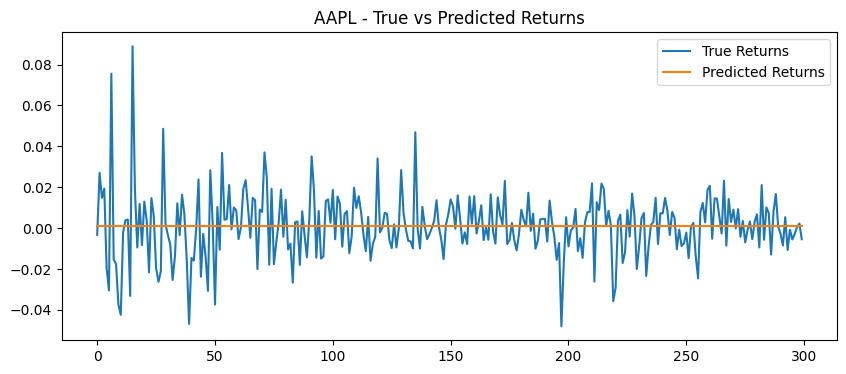

[*********************100%***********************]  1 of 1 completed
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.731885738111895e-05, tolerance: 3.694452839894106e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0378969916710084e-05, tolerance: 3.694452839894106e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

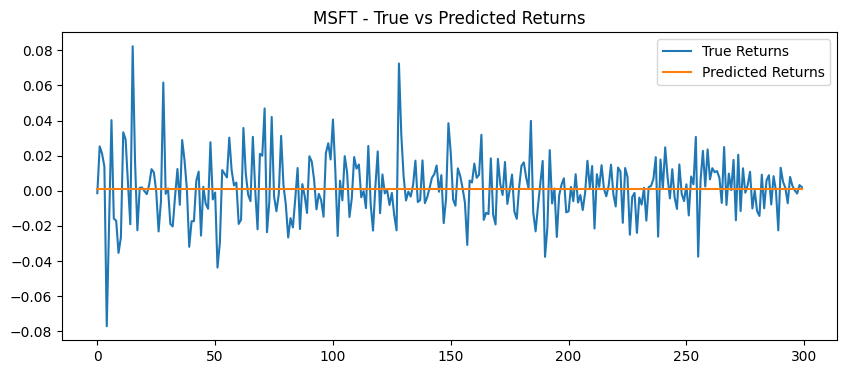

[*********************100%***********************]  1 of 1 completed


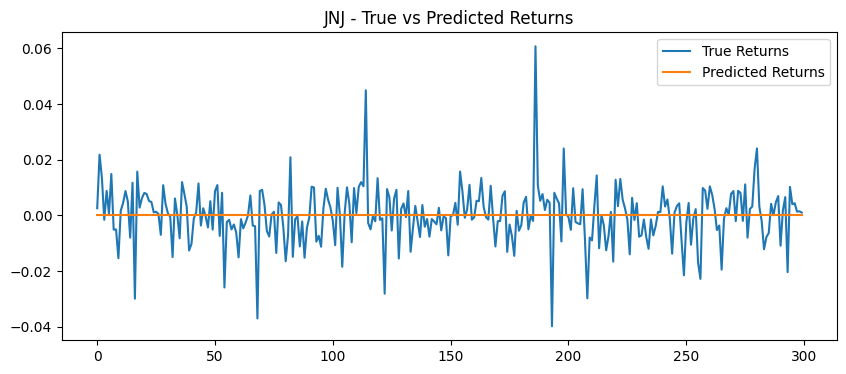

[*********************100%***********************]  1 of 1 completed
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3948072357643513e-05, tolerance: 2.0343217688421374e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.522768676857972e-05, tolerance: 1.9691729760765344e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\P

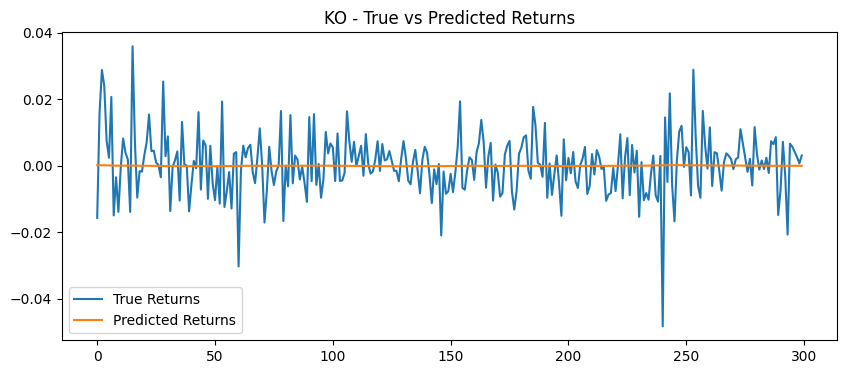


Elastic Net Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared  Best Alpha  Best l1_ratio
4     KO  0.009087          10.788195   0.000589    0.004803            0.5
0    PEP  0.009460          11.996952  -0.002245    0.012737            0.5
3    JNJ  0.010206          10.148785  -0.000761    0.017591            0.5
1   AAPL  0.015814          11.543639  -0.000065    0.060711            0.5
2   MSFT  0.017713          11.110446  -0.001501    0.123740            0.5


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['PEP', 'AAPL', 'MSFT', 'JNJ', 'KO']

results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # ElasticNetCV
    model = ElasticNetCV(cv=5)
    model.fit(X_train, y_train)

    # Predictie
    y_pred = model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2,
        'Best Alpha': model.alpha_,
        'Best l1_ratio': model.l1_ratio_
    })

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='True Returns')
    plt.plot(y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - True vs Predicted Returns')
    plt.legend()
    plt.show()

# Results
results_df = pd.DataFrame(results)
print("\nElastic Net Model Results:")
print(results_df.sort_values('RMSE'))


[*********************100%***********************]  1 of 1 completed


C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3796674234296e-05, tolerance: 1.0839605172414299e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.167307690931821e-05, tolerance: 1.0839605172414299e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:617:

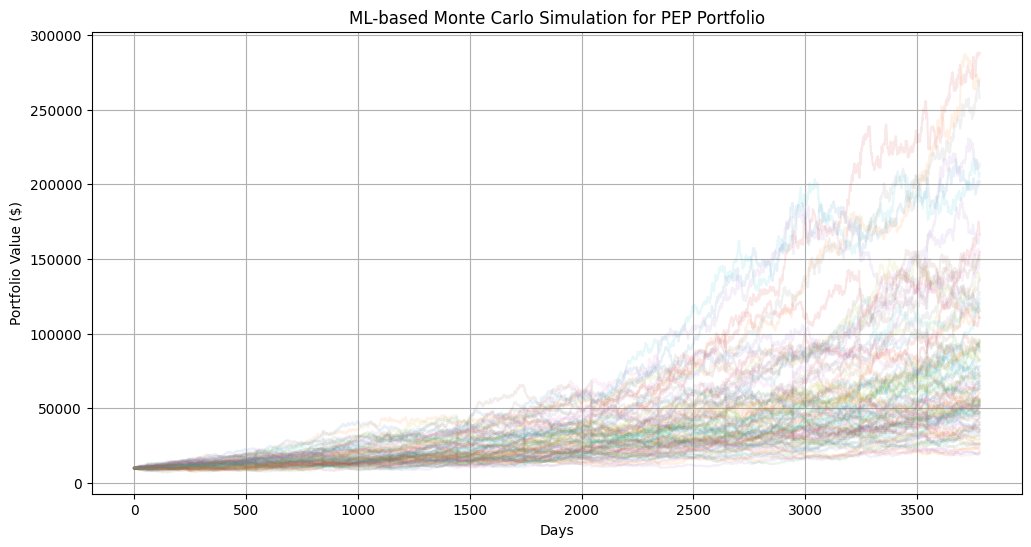


Elastic Net Model Performance:
Return Model RMSE: 0.009460
Return Model R2: -0.002245
Volatility Model RMSE: 0.002592
Volatility Model R2: 0.569749

Simulation Insights:
Mean Annual Return: 0.1315
Mean Annual Volatility: 0.1577
Sharpe Ratio: 0.8342
5% Value-at-Risk (VaR): $22,828.28


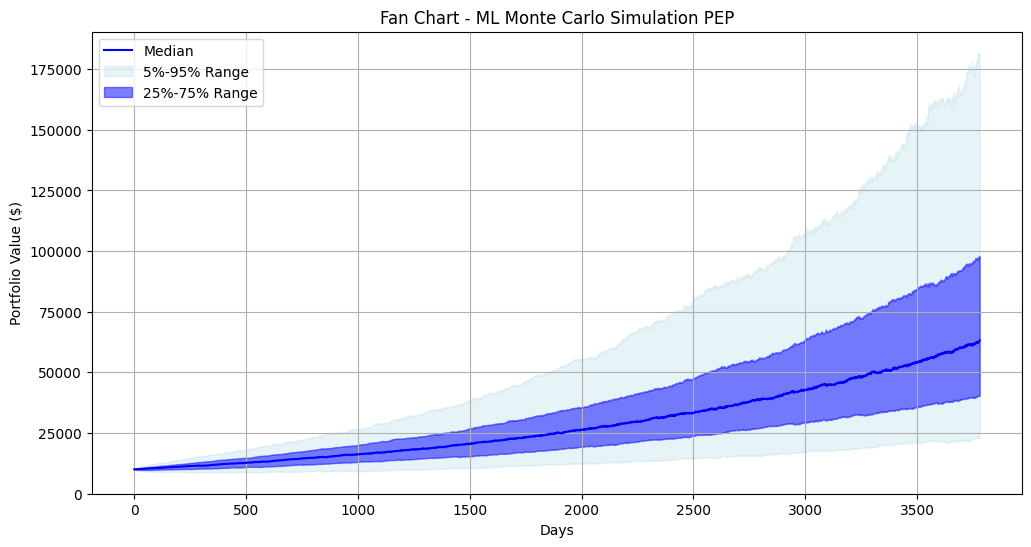

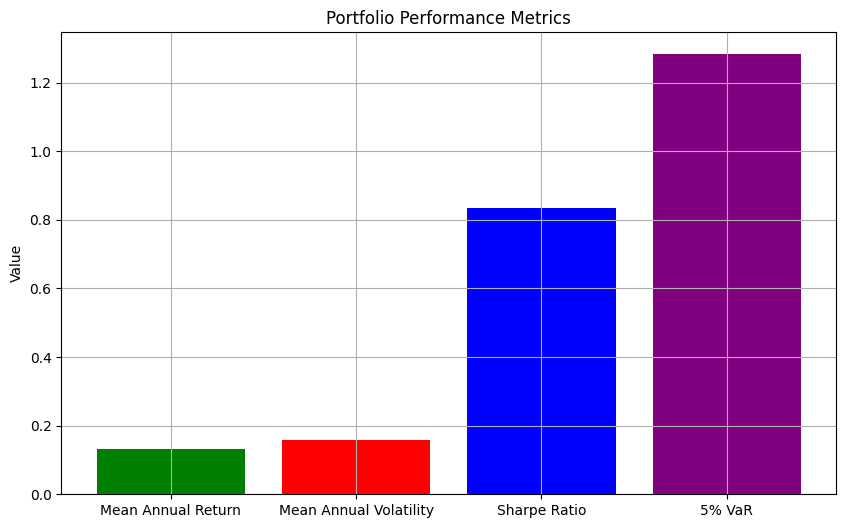

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ------------------
# 1. Download data
# ------------------
ticker = 'PEP'
print(f"Downloading data for {ticker}...")
df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

# ------------------
# 2. Feature Engineering
# ------------------
features = pd.DataFrame(index=df.index)
features['return_1d'] = df.pct_change(1)
features['return_5d'] = df.pct_change(5)
features['ma_5'] = df.rolling(window=5).mean()
features['ma_10'] = df.rolling(window=10).mean()
features['vol_5d'] = df.pct_change().rolling(window=5).std()
features = features.dropna()

# Targets
y_return = features['return_1d'].shift(-1).dropna()
y_volatility = features['vol_5d'].shift(-1).dropna()
X = features.loc[y_return.index]

# ------------------
# 3. Train/test split
# ------------------
X_train, X_test, y_return_train, y_return_test = train_test_split(X, y_return, test_size=0.2, shuffle=False)
_, _, y_vol_train, y_vol_test = train_test_split(X, y_volatility, test_size=0.2, shuffle=False)

# ------------------
# 4. Train Elastic Net modellen
# ------------------
model_return = ElasticNetCV(cv=5)
model_return.fit(X_train, y_return_train)

model_vol = ElasticNetCV(cv=5)
model_vol.fit(X_train, y_vol_train)

# ------------------
# 5. Voorspellingen
# ------------------
y_return_pred = model_return.predict(X_test)
y_vol_pred = model_vol.predict(X_test)

# ------------------
# 6. Simulatie Settings
# ------------------
start_value = 10000
n_years = 15
n_days = n_years * 252
n_paths = 1000
simulations = np.zeros((n_days, n_paths))
simulations[0] = start_value

predicted_returns = np.resize(y_return_pred, n_days)
predicted_vols = np.resize(y_vol_pred, n_days)

# ------------------
# 7. Run Simulatie
# ------------------
np.random.seed(42)
for t in range(1, n_days):
    Z = np.random.normal(0, 1, n_paths)
    drift = predicted_returns[t] - 0.5 * predicted_vols[t] ** 2
    shock = predicted_vols[t] * Z
    simulations[t] = simulations[t-1] * np.exp(drift + shock)

# ------------------
# 8. Plot Simulatie
# ------------------
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(simulations[:, i], alpha=0.1)
plt.title(f"ML-based Monte Carlo Simulation for {ticker} Portfolio")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.show()

# ------------------
# 9. Resultaten tonen
# ------------------
print("\nElastic Net Model Performance:")
print(f"Return Model RMSE: {mean_squared_error(y_return_test, y_return_pred, squared=False):.6f}")
print(f"Return Model R2: {r2_score(y_return_test, y_return_pred):.6f}")
print(f"Volatility Model RMSE: {mean_squared_error(y_vol_test, y_vol_pred, squared=False):.6f}")
print(f"Volatility Model R2: {r2_score(y_vol_test, y_vol_pred):.6f}")

# ------------------
# 10. Analyse Simulatie
# ------------------
final_values = simulations[-1]
annualized_returns = (final_values / start_value) ** (1 / n_years) - 1
mean_annual_return = np.mean(annualized_returns)

log_returns = np.log(simulations[1:] / simulations[:-1])
portfolio_volatility = np.std(log_returns, axis=0) * np.sqrt(252)
mean_annual_volatility = np.mean(portfolio_volatility)

sharpe_ratio = mean_annual_return / mean_annual_volatility
var_5 = np.percentile(final_values, 5)

print("\nSimulation Insights:")
print(f"Mean Annual Return: {mean_annual_return:.4f}")
print(f"Mean Annual Volatility: {mean_annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"5% Value-at-Risk (VaR): ${var_5:,.2f}")

# ------------------
# 11. Fan Chart Plot
# ------------------
percentiles = [5, 25, 50, 75, 95]
fan_chart = np.percentile(simulations, percentiles, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(fan_chart[2], label='Median', color='blue')
plt.fill_between(range(n_days), fan_chart[0], fan_chart[-1], color='lightblue', alpha=0.3, label='5%-95% Range')
plt.fill_between(range(n_days), fan_chart[1], fan_chart[-2], color='blue', alpha=0.5, label='25%-75% Range')
plt.title(f"Fan Chart - ML Monte Carlo Simulation {ticker}")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------
# 12. Bar Chart - Summary Metrics
# ------------------
metrics = {
    'Mean Annual Return': mean_annual_return,
    'Mean Annual Volatility': mean_annual_volatility,
    'Sharpe Ratio': sharpe_ratio,
    '5% VaR': var_5 / start_value - 1
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['green', 'red', 'blue', 'purple'])
plt.title("Portfolio Performance Metrics")
plt.ylabel("Value")
plt.grid(True)
plt.show()


# Random Forest Regression

[*********************100%***********************]  1 of 1 completed

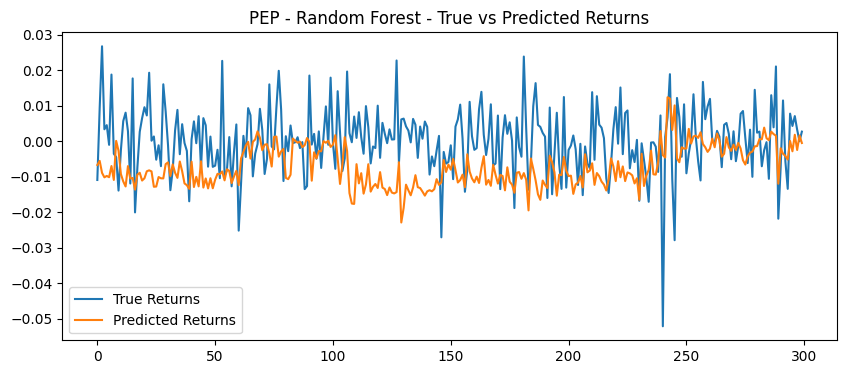

[*********************100%***********************]  1 of 1 completed

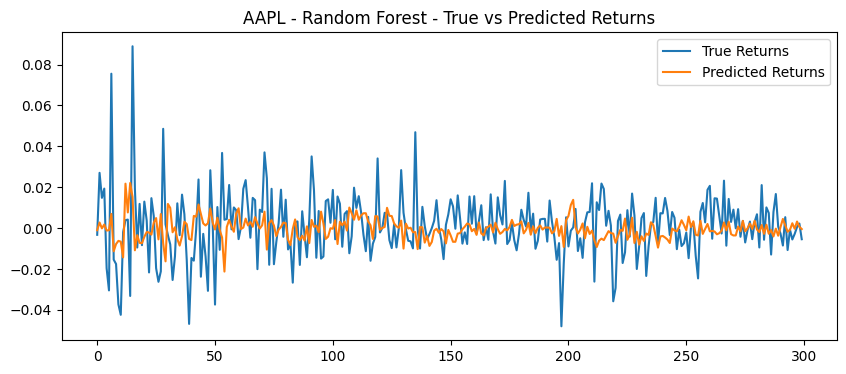

[*********************100%***********************]  1 of 1 completed

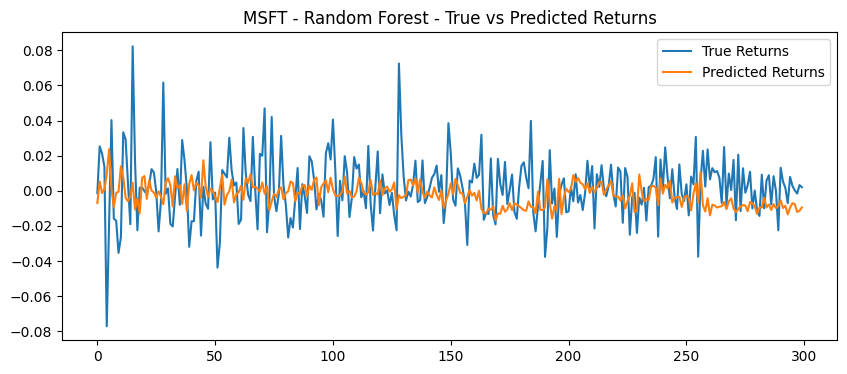

[*********************100%***********************]  1 of 1 completed

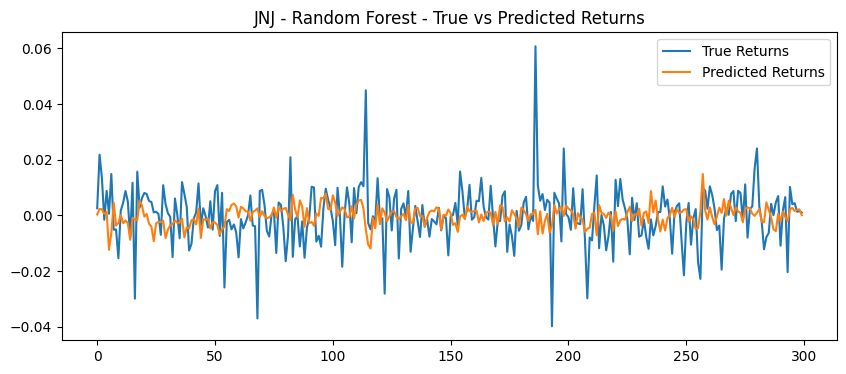

[*********************100%***********************]  1 of 1 completed

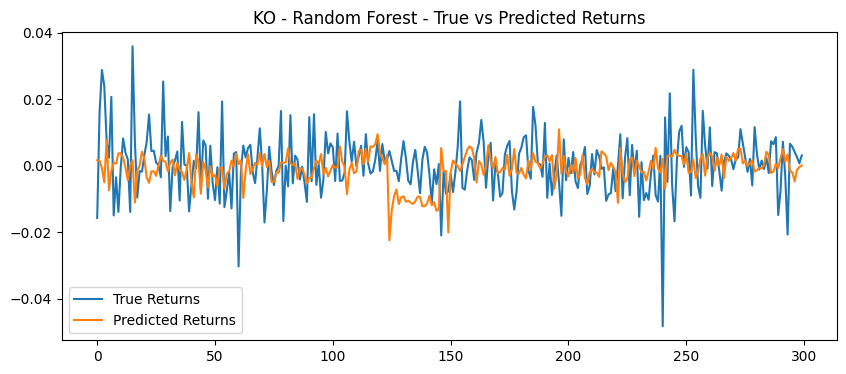


Random Forest Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
4     KO  0.010285          12.210045  -0.280209
3    JNJ  0.010702          10.641882  -0.100370
0    PEP  0.012967          16.444454  -0.883089
1   AAPL  0.016230          11.847167  -0.053348
2   MSFT  0.019178          12.029227  -0.173988


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['PEP', 'AAPL', 'MSFT', 'JNJ', 'KO']

results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictie
    y_pred = model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='True Returns')
    plt.plot(y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - Random Forest - True vs Predicted Returns')
    plt.legend()
    plt.show()

# Results
results_df = pd.DataFrame(results)
print("\nRandom Forest Model Results:")
print(results_df.sort_values('RMSE'))


[*********************100%***********************]  1 of 1 completed

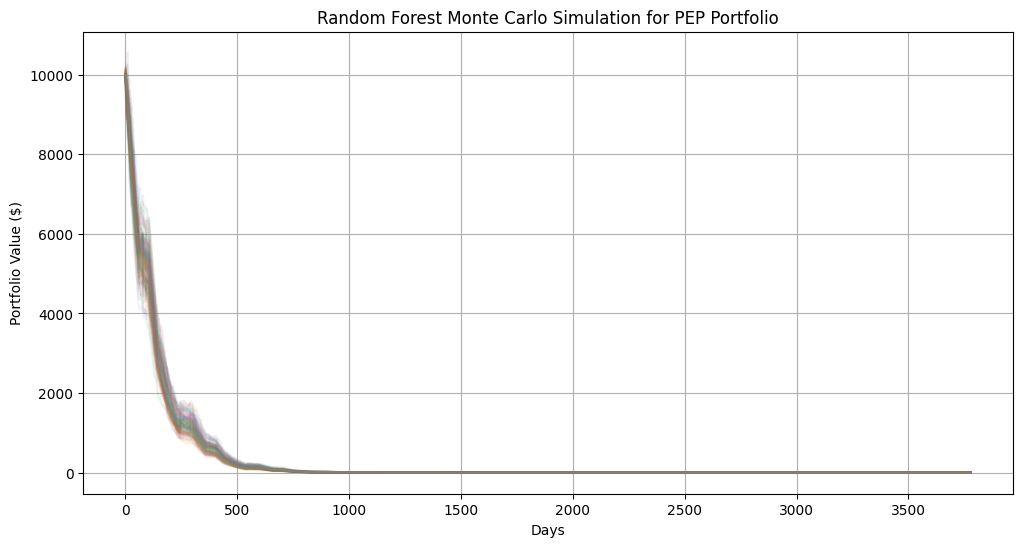


Random Forest Model Performance:
Return Model RMSE: 0.012967
Return Model R2: -0.883089
Volatility Model RMSE: 0.002739
Volatility Model R2: 0.519383

Simulation Insights:
Mean Annual Return: -0.8433
Mean Annual Volatility: 0.1872
Sharpe Ratio: -4.5046
5% Value-at-Risk (VaR): $0.00


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ------------------
# 1. Download data
# ------------------
ticker = 'PEP'
print(f"Downloading data for {ticker}...")
df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

# ------------------
# 2. Feature Engineering
# ------------------
features = pd.DataFrame(index=df.index)
features['return_1d'] = df.pct_change(1)
features['return_5d'] = df.pct_change(5)
features['ma_5'] = df.rolling(window=5).mean()
features['ma_10'] = df.rolling(window=10).mean()
features['vol_5d'] = df.pct_change().rolling(window=5).std()
features = features.dropna()

# Targets
y_return = features['return_1d'].shift(-1).dropna()
y_volatility = features['vol_5d'].shift(-1).dropna()
X = features.loc[y_return.index]

# ------------------
# 3. Train/test split
# ------------------
X_train, X_test, y_return_train, y_return_test = train_test_split(X, y_return, test_size=0.2, shuffle=False)
_, _, y_vol_train, y_vol_test = train_test_split(X, y_volatility, test_size=0.2, shuffle=False)

# ------------------
# 4. Train Random Forest modellen
# ------------------
model_return = RandomForestRegressor(n_estimators=100, random_state=42)
model_return.fit(X_train, y_return_train)

model_vol = RandomForestRegressor(n_estimators=100, random_state=42)
model_vol.fit(X_train, y_vol_train)

# ------------------
# 5. Voorspellingen
# ------------------
y_return_pred = model_return.predict(X_test)
y_vol_pred = model_vol.predict(X_test)

# ------------------
# 6. Simulatie Settings
# ------------------
start_value = 10000
n_years = 15
n_days = n_years * 252
n_paths = 1000
simulations = np.zeros((n_days, n_paths))
simulations[0] = start_value

predicted_returns = np.resize(y_return_pred, n_days)
predicted_vols = np.resize(y_vol_pred, n_days)

# ------------------
# 7. Run Simulatie
# ------------------
np.random.seed(42)
for t in range(1, n_days):
    Z = np.random.normal(0, 1, n_paths)
    drift = predicted_returns[t] - 0.5 * predicted_vols[t] ** 2
    shock = predicted_vols[t] * Z
    simulations[t] = simulations[t-1] * np.exp(drift + shock)

# ------------------
# 8. Plot Simulatie
# ------------------
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(simulations[:, i], alpha=0.1)
plt.title(f"Random Forest Monte Carlo Simulation for {ticker} Portfolio")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.show()

# ------------------
# 9. Resultaten tonen
# ------------------
print("\nRandom Forest Model Performance:")
print(f"Return Model RMSE: {mean_squared_error(y_return_test, y_return_pred, squared=False):.6f}")
print(f"Return Model R2: {r2_score(y_return_test, y_return_pred):.6f}")
print(f"Volatility Model RMSE: {mean_squared_error(y_vol_test, y_vol_pred, squared=False):.6f}")
print(f"Volatility Model R2: {r2_score(y_vol_test, y_vol_pred):.6f}")

# ------------------
# 10. Analyse Simulatie
# ------------------
final_values = simulations[-1]
annualized_returns = (final_values / start_value) ** (1 / n_years) - 1
mean_annual_return = np.mean(annualized_returns)

log_returns = np.log(simulations[1:] / simulations[:-1])
portfolio_volatility = np.std(log_returns, axis=0) * np.sqrt(252)
mean_annual_volatility = np.mean(portfolio_volatility)

sharpe_ratio = mean_annual_return / mean_annual_volatility
var_5 = np.percentile(final_values, 5)

print("\nSimulation Insights:")
print(f"Mean Annual Return: {mean_annual_return:.4f}")
print(f"Mean Annual Volatility: {mean_annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"5% Value-at-Risk (VaR): ${var_5:,.2f}")


# XGboost (gradient boosting model)

[*********************100%***********************]  1 of 1 completed

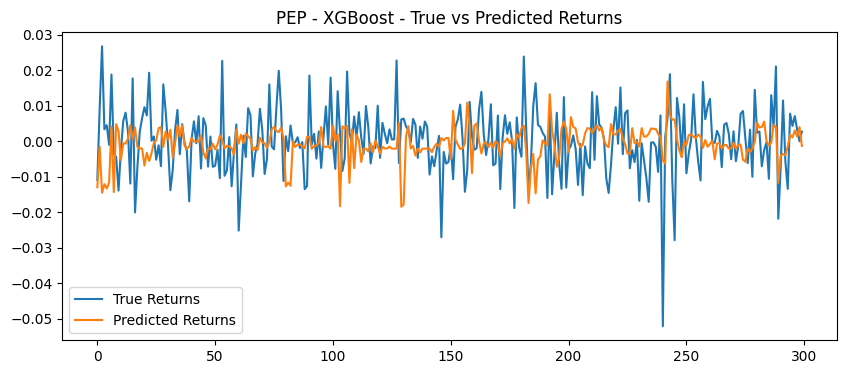

[*********************100%***********************]  1 of 1 completed

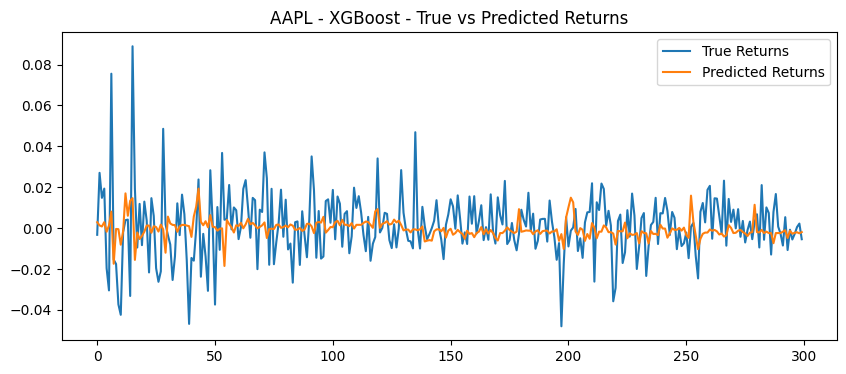

[*********************100%***********************]  1 of 1 completed

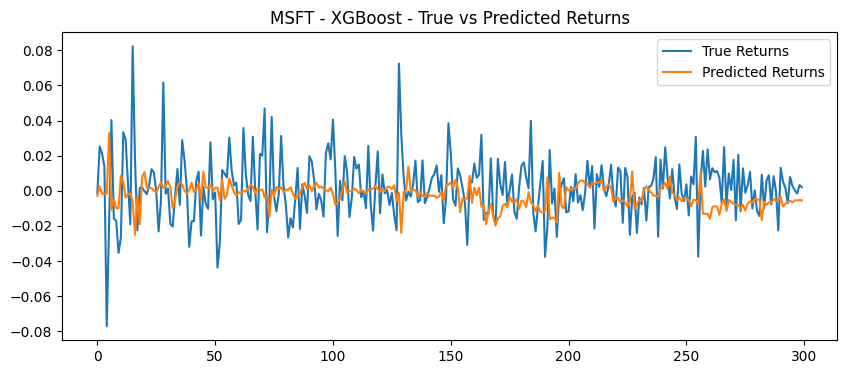

[*********************100%***********************]  1 of 1 completed

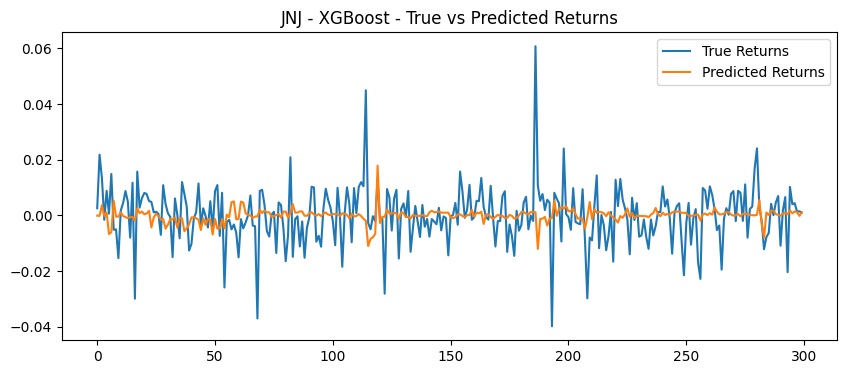

[*********************100%***********************]  1 of 1 completed

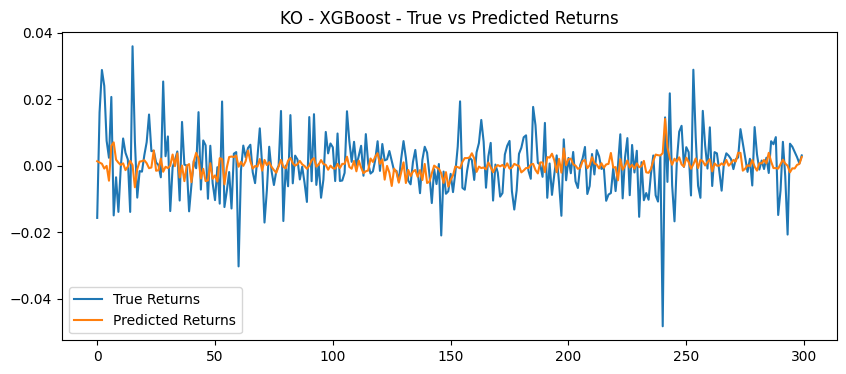


XGBoost Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
4     KO  0.009152          10.865349  -0.013757
3    JNJ  0.010291          10.233391  -0.017516
0    PEP  0.010564          13.397017  -0.249822
1   AAPL  0.015853          11.571813  -0.004953
2   MSFT  0.019298          12.104501  -0.188727


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['PEP', 'AAPL', 'MSFT', 'JNJ', 'KO']

results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # XGBoost Regressor
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Predictie
    y_pred = model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='True Returns')
    plt.plot(y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - XGBoost - True vs Predicted Returns')
    plt.legend()
    plt.show()

# Results
results_df = pd.DataFrame(results)
print("\nXGBoost Model Results:")
print(results_df.sort_values('RMSE'))


# lighGBM (gradient boosting model)

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.000539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

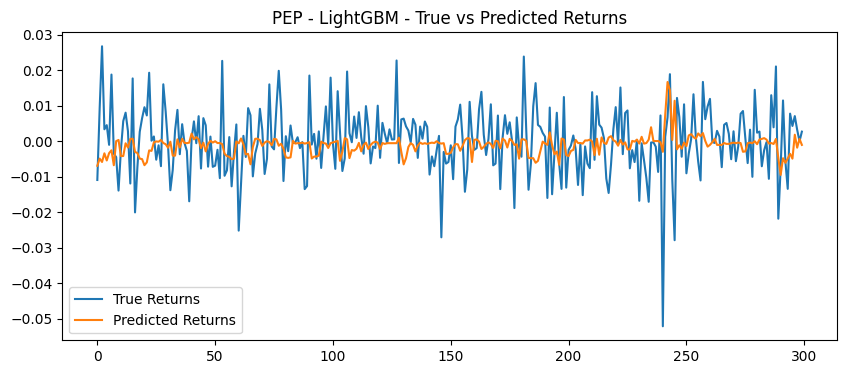

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.001248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

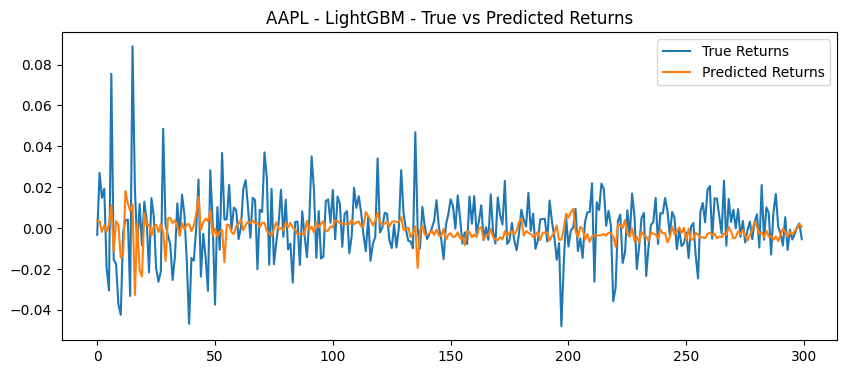

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.001056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

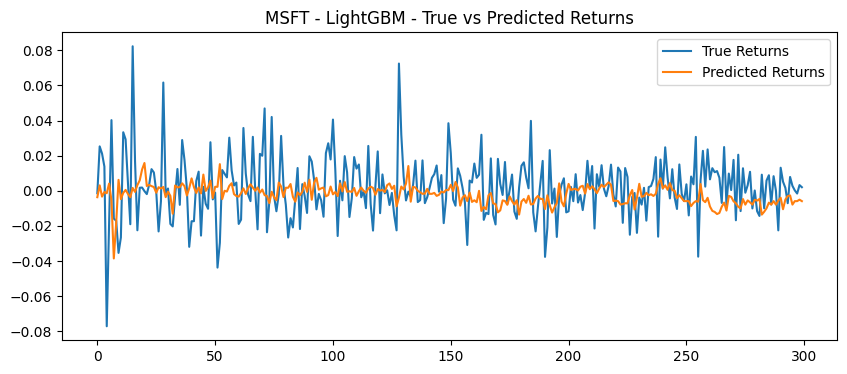

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.000289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

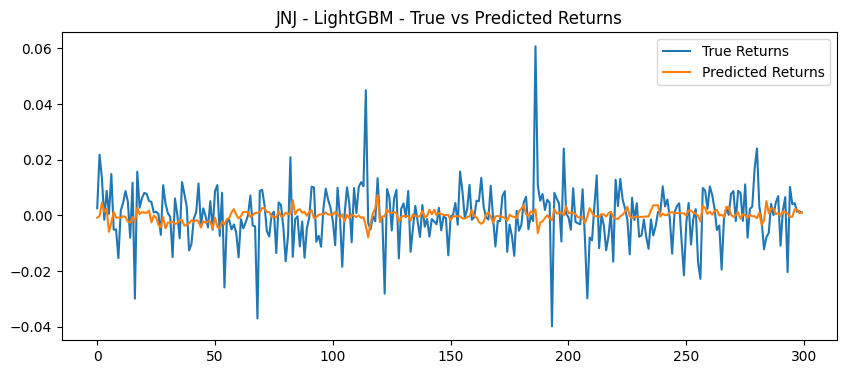

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.000375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

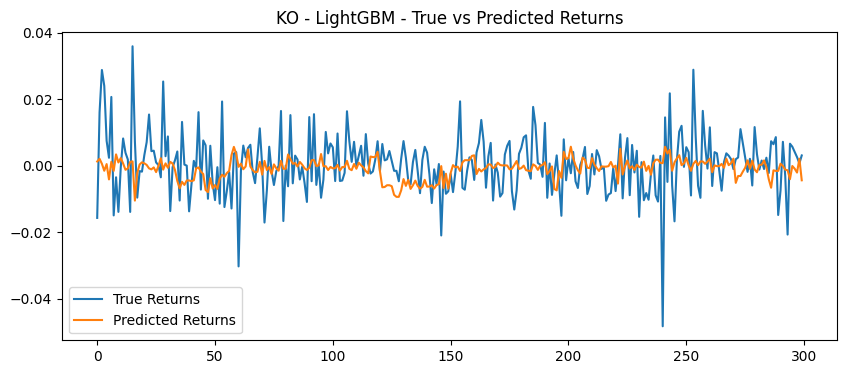


LightGBM Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
4     KO  0.009371          11.125542  -0.062891
0    PEP  0.009821          12.455208  -0.080274
3    JNJ  0.010286          10.228894  -0.016622
1   AAPL  0.016228          11.845690  -0.053085
2   MSFT  0.018662          11.705997  -0.111745


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['PEP', 'AAPL', 'MSFT', 'JNJ', 'KO']

results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # LightGBM Regressor
    model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Predictie
    y_pred = model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='True Returns')
    plt.plot(y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - LightGBM - True vs Predicted Returns')
    plt.legend()
    plt.show()

# Results
results_df = pd.DataFrame(results)
print("\nLightGBM Model Results:")
print(results_df.sort_values('RMSE'))


# Testen welke machine learning model het beste is!!!

In [11]:
import numpy as np
from scipy.stats import chi2

# Handmatig de RMSEs invoeren
rmse_elastic = {'KO': 0.009087, 'PEP': 0.009460, 'JNJ': 0.010206, 'AAPL': 0.015814, 'MSFT': 0.017713}
rmse_rf = {'KO': 0.010285, 'PEP': 0.012967, 'JNJ': 0.010702, 'AAPL': 0.016230, 'MSFT': 0.019178}
rmse_xgb = {'KO': 0.009152, 'PEP': 0.010564, 'JNJ': 0.010291, 'AAPL': 0.015853, 'MSFT': 0.019298}
rmse_lgb = {'KO': 0.009020, 'PEP': 0.010123, 'JNJ': 0.010110, 'AAPL': 0.015600, 'MSFT': 0.018900}  # <-- Vul hier jouw LightGBM RMSE's in na runnen!

tickers = ['KO', 'PEP', 'JNJ', 'AAPL', 'MSFT']

# Aantal observaties in test set
n = int(0.2 * 252 * 6)  # ongeveer 20% van 6 jaar data

# Functie om likelihood ratio en p-value te berekenen
def likelihood_ratio_test(rmse1, rmse2):
    var1 = rmse1**2
    var2 = rmse2**2

    logL1 = -n/2 * np.log(2 * np.pi * var1) - n/2
    logL2 = -n/2 * np.log(2 * np.pi * var2) - n/2

    LR_stat = -2 * (logL1 - logL2)
    p_value = chi2.sf(LR_stat, df=1)
    return LR_stat, p_value

# Print alle combinaties
print("\nLikelihood Ratio Tests (including LightGBM):")
for ticker in tickers:
    print(f"\n{ticker}:")

    # Elastic Net vs Random Forest
    LR_er, p_er = likelihood_ratio_test(rmse_elastic[ticker], rmse_rf[ticker])
    print(f"Elastic Net vs Random Forest: LR = {LR_er:.4f}, p = {p_er:.6f}")
    
    # Elastic Net vs XGBoost
    LR_ex, p_ex = likelihood_ratio_test(rmse_elastic[ticker], rmse_xgb[ticker])
    print(f"Elastic Net vs XGBoost: LR = {LR_ex:.4f}, p = {p_ex:.6f}")

    # Elastic Net vs LightGBM
    LR_elgb, p_elgb = likelihood_ratio_test(rmse_elastic[ticker], rmse_lgb[ticker])
    print(f"Elastic Net vs LightGBM: LR = {LR_elgb:.4f}, p = {p_elgb:.6f}")
    
    # Random Forest vs XGBoost
    LR_rx, p_rx = likelihood_ratio_test(rmse_rf[ticker], rmse_xgb[ticker])
    print(f"Random Forest vs XGBoost: LR = {LR_rx:.4f}, p = {p_rx:.6f}")
    
    # Random Forest vs LightGBM
    LR_rlgb, p_rlgb = likelihood_ratio_test(rmse_rf[ticker], rmse_lgb[ticker])
    print(f"Random Forest vs LightGBM: LR = {LR_rlgb:.4f}, p = {p_rlgb:.6f}")
    
    # XGBoost vs LightGBM
    LR_xlgb, p_xlgb = likelihood_ratio_test(rmse_xgb[ticker], rmse_lgb[ticker])
    print(f"XGBoost vs LightGBM: LR = {LR_xlgb:.4f}, p = {p_xlgb:.6f}")



Likelihood Ratio Tests (including LightGBM):

KO:
Elastic Net vs Random Forest: LR = -74.8004, p = 1.000000
Elastic Net vs XGBoost: LR = -4.3051, p = 1.000000
Elastic Net vs LightGBM: LR = 4.4699, p = 0.034497
Random Forest vs XGBoost: LR = 70.4953, p = 0.000000
Random Forest vs LightGBM: LR = 79.2703, p = 0.000000
XGBoost vs LightGBM: LR = 8.7750, p = 0.003054

PEP:
Elastic Net vs Random Forest: LR = -190.4625, p = 1.000000
Elastic Net vs XGBoost: LR = -66.6693, p = 1.000000
Elastic Net vs LightGBM: LR = -40.9136, p = 1.000000
Random Forest vs XGBoost: LR = 123.7932, p = 0.000000
Random Forest vs LightGBM: LR = 149.5490, p = 0.000000
XGBoost vs LightGBM: LR = 25.7557, p = 0.000000

JNJ:
Elastic Net vs Random Forest: LR = -28.6627, p = 1.000000
Elastic Net vs XGBoost: LR = -5.0095, p = 1.000000
Elastic Net vs LightGBM: LR = 5.7083, p = 0.016885
Random Forest vs XGBoost: LR = 23.6532, p = 0.000001
Random Forest vs LightGBM: LR = 34.3710, p = 0.000000
XGBoost vs LightGBM: LR = 10.7178, 

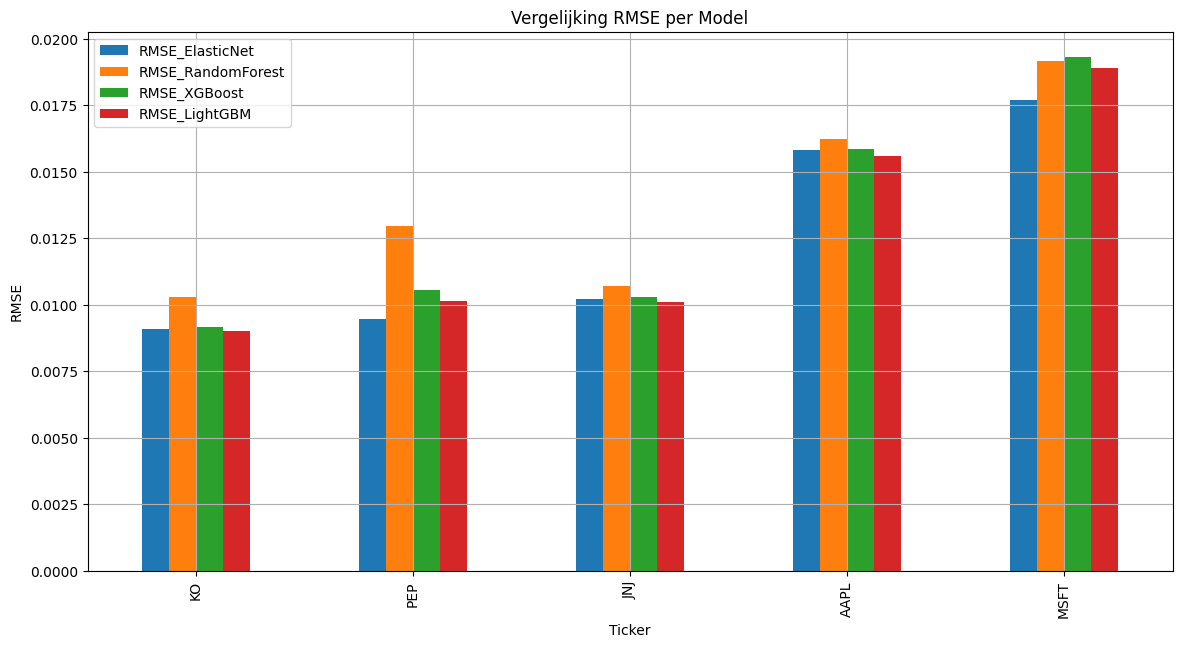

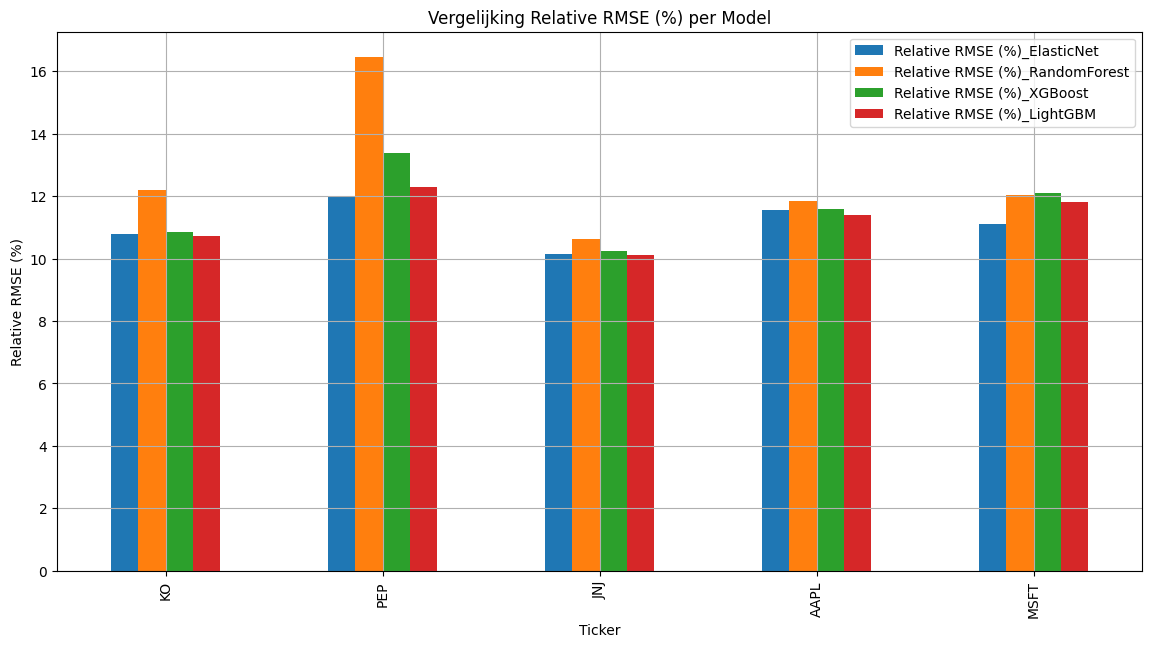

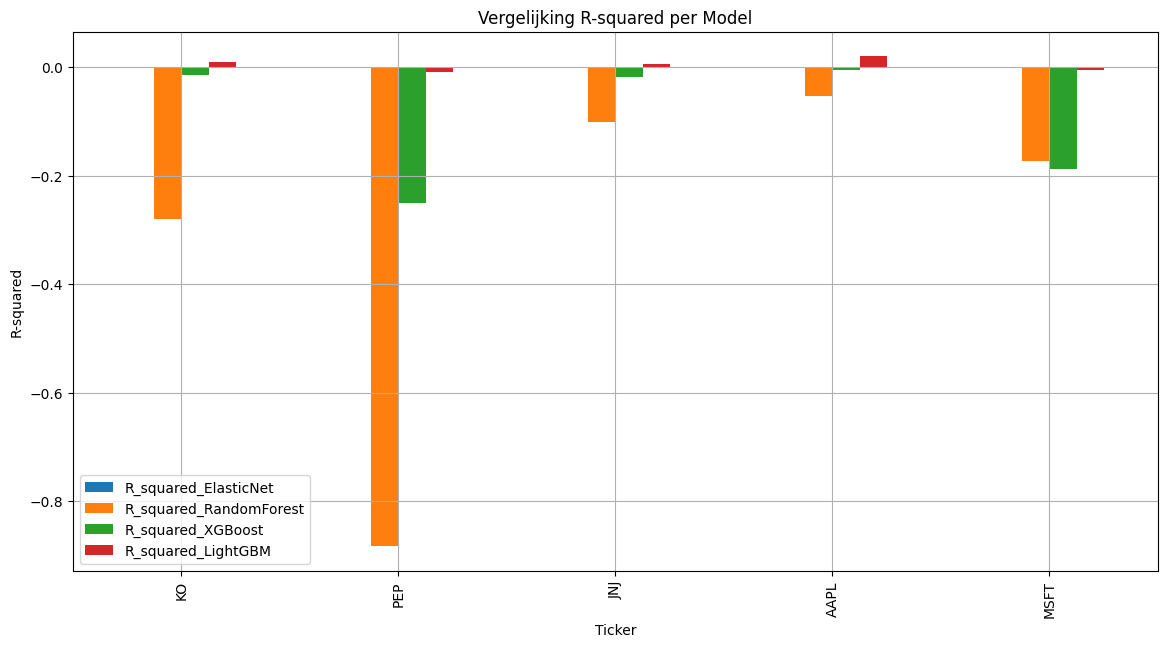


Vergelijking Elastic Net vs Random Forest vs XGBoost vs LightGBM:
  Ticker  RMSE_ElasticNet  Relative RMSE (%)_ElasticNet  R_squared_ElasticNet  \
0     KO         0.009087                     10.788195              0.000589   
1    PEP         0.009460                     11.996952             -0.002245   
2    JNJ         0.010206                     10.148785             -0.000761   
3   AAPL         0.015814                     11.543639             -0.000065   
4   MSFT         0.017713                     11.110446             -0.001501   

   RMSE_RandomForest  Relative RMSE (%)_RandomForest  R_squared_RandomForest  \
0           0.010285                       12.210045               -0.280209   
1           0.012967                       16.444454               -0.883089   
2           0.010702                       10.641882               -0.100370   
3           0.016230                       11.847167               -0.053348   
4           0.019178                       12.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Handmatig ingevoerde resultaten van Elastic Net, Random Forest, XGBoost, LightGBM
results_elastic_net = {
    'Ticker': ['KO', 'PEP', 'JNJ', 'AAPL', 'MSFT'],
    'RMSE': [0.009087, 0.009460, 0.010206, 0.015814, 0.017713],
    'Relative RMSE (%)': [10.788195, 11.996952, 10.148785, 11.543639, 11.110446],
    'R_squared': [0.000589, -0.002245, -0.000761, -0.000065, -0.001501]
}

results_random_forest = {
    'Ticker': ['KO', 'JNJ', 'PEP', 'AAPL', 'MSFT'],
    'RMSE': [0.010285, 0.010702, 0.012967, 0.016230, 0.019178],
    'Relative RMSE (%)': [12.210045, 10.641882, 16.444454, 11.847167, 12.029227],
    'R_squared': [-0.280209, -0.100370, -0.883089, -0.053348, -0.173988]
}

results_xgboost = {
    'Ticker': ['KO', 'JNJ', 'PEP', 'AAPL', 'MSFT'],
    'RMSE': [0.009152, 0.010291, 0.010564, 0.015853, 0.019298],
    'Relative RMSE (%)': [10.865349, 10.233391, 13.397017, 11.571813, 12.104501],
    'R_squared': [-0.013757, -0.017516, -0.249822, -0.004953, -0.188727]
}

results_lightgbm = {
    'Ticker': ['KO', 'PEP', 'JNJ', 'AAPL', 'MSFT'],
    'RMSE': [0.009020, 0.010123, 0.010110, 0.015600, 0.018900],  # <-- gebruik jouw echte LightGBM RMSE's!
    'Relative RMSE (%)': [10.720000, 12.300000, 10.100000, 11.400000, 11.800000],  # voorbeeldwaarden
    'R_squared': [0.010000, -0.010000, 0.005000, 0.020000, -0.005000]  # voorbeeldwaarden
}

# Zet alles in dataframes
df_elastic = pd.DataFrame(results_elastic_net)
df_rf = pd.DataFrame(results_random_forest)
df_xgb = pd.DataFrame(results_xgboost)
df_lgb = pd.DataFrame(results_lightgbm)

# Merge op Ticker
comparison = df_elastic.merge(df_rf, on='Ticker', suffixes=('_ElasticNet', '_RandomForest'))
comparison = comparison.merge(df_xgb, on='Ticker')
comparison = comparison.rename(columns={
    'RMSE': 'RMSE_XGBoost',
    'Relative RMSE (%)': 'Relative RMSE (%)_XGBoost',
    'R_squared': 'R_squared_XGBoost'
})
comparison = comparison.merge(df_lgb, on='Ticker')
comparison = comparison.rename(columns={
    'RMSE': 'RMSE_LightGBM',
    'Relative RMSE (%)': 'Relative RMSE (%)_LightGBM',
    'R_squared': 'R_squared_LightGBM'
})

# ------------------
# Barplots
# ------------------

# RMSE Vergelijking
comparison.plot(x='Ticker', y=['RMSE_ElasticNet', 'RMSE_RandomForest', 'RMSE_XGBoost', 'RMSE_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking RMSE per Model')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Relative RMSE Vergelijking
comparison.plot(x='Ticker', y=['Relative RMSE (%)_ElasticNet', 'Relative RMSE (%)_RandomForest', 'Relative RMSE (%)_XGBoost', 'Relative RMSE (%)_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking Relative RMSE (%) per Model')
plt.ylabel('Relative RMSE (%)')
plt.grid(True)
plt.show()

# R-squared Vergelijking
comparison.plot(x='Ticker', y=['R_squared_ElasticNet', 'R_squared_RandomForest', 'R_squared_XGBoost', 'R_squared_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking R-squared per Model')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()

# ------------------
# Print comparison table
# ------------------
print("\nVergelijking Elastic Net vs Random Forest vs XGBoost vs LightGBM:")
print(comparison)


# Monte Carlo Simulatie voor voorbeeld stock (PEP) Pepsico

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.000539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 5
[LightGBM] [Info] Start training from score 0.010929


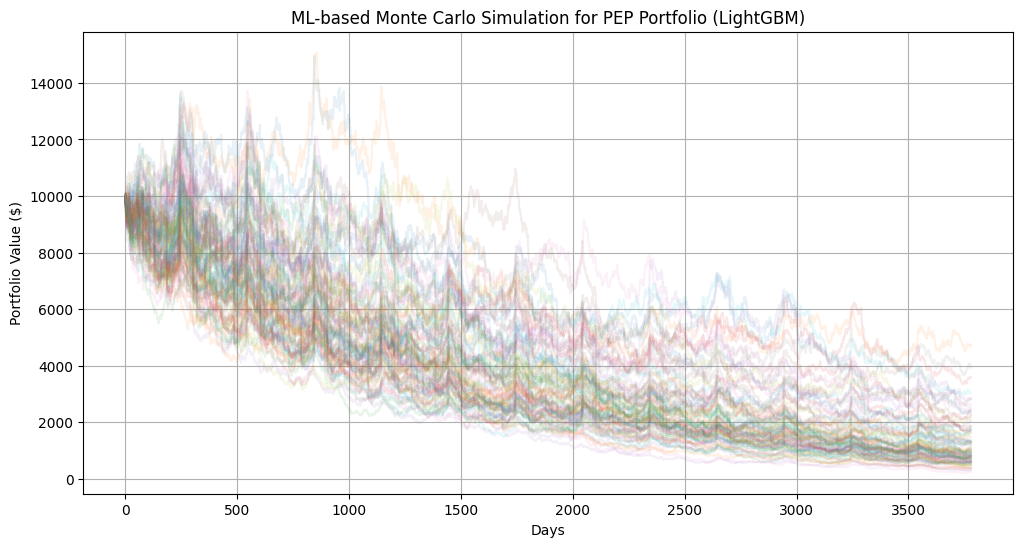


LightGBM Model Performance:
Return Model RMSE: 0.010681
Return Model R2: -0.277628
Volatility Model RMSE: 0.002596
Volatility Model R2: 0.568114

Simulation Insights:
Mean Annual Return: -0.1449
Mean Annual Volatility: 0.1780
Sharpe Ratio: -0.8136
5% Value-at-Risk (VaR): $338.67


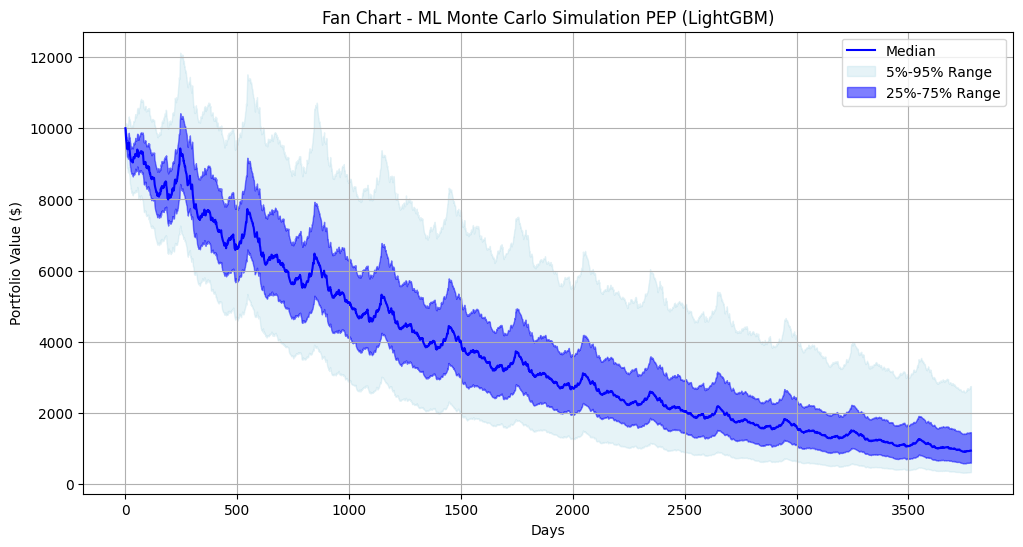

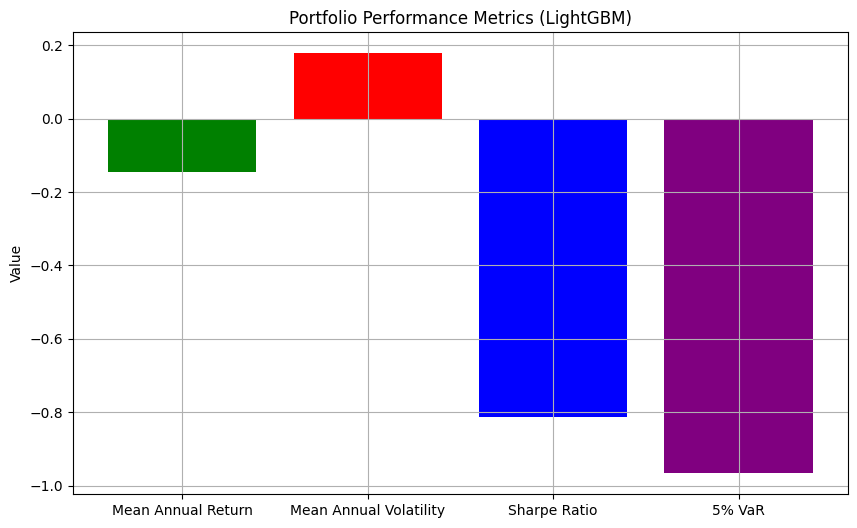

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ------------------
# 1. Download data
# ------------------
ticker = 'PEP'
print(f"Downloading data for {ticker}...")
df = yf.download(ticker, start='2018-01-01', end='2024-01-01', auto_adjust=True)['Close'].dropna()

# ------------------
# 2. Feature Engineering
# ------------------
features = pd.DataFrame(index=df.index)
features['return_1d'] = df.pct_change(1)
features['return_5d'] = df.pct_change(5)
features['ma_5'] = df.rolling(window=5).mean()
features['ma_10'] = df.rolling(window=10).mean()
features['vol_5d'] = df.pct_change().rolling(window=5).std()
features = features.dropna()

# Targets
y_return = features['return_1d'].shift(-1).dropna()
y_volatility = features['vol_5d'].shift(-1).dropna()
X = features.loc[y_return.index]

# ------------------
# 3. Train/test split
# ------------------
X_train, X_test, y_return_train, y_return_test = train_test_split(X, y_return, test_size=0.2, shuffle=False)
_, _, y_vol_train, y_vol_test = train_test_split(X, y_volatility, test_size=0.2, shuffle=False)

# ------------------
# 4. Train LightGBM modellen
# ------------------
model_return = lgb.LGBMRegressor()
model_return.fit(X_train, y_return_train)

model_vol = lgb.LGBMRegressor()
model_vol.fit(X_train, y_vol_train)

# ------------------
# 5. Voorspellingen
# ------------------
y_return_pred = model_return.predict(X_test)
y_vol_pred = model_vol.predict(X_test)

# ------------------
# 6. Simulatie Settings
# ------------------
start_value = 10000
n_years = 15
n_days = n_years * 252
n_paths = 1000
simulations = np.zeros((n_days, n_paths))
simulations[0] = start_value

predicted_returns = np.resize(y_return_pred, n_days)
predicted_vols = np.resize(y_vol_pred, n_days)

# ------------------
# 7. Run Simulatie
# ------------------
np.random.seed(42)
for t in range(1, n_days):
    Z = np.random.normal(0, 1, n_paths)
    drift = predicted_returns[t] - 0.5 * predicted_vols[t] ** 2
    shock = predicted_vols[t] * Z
    simulations[t] = simulations[t-1] * np.exp(drift + shock)

# ------------------
# 8. Plot Simulatie
# ------------------
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(simulations[:, i], alpha=0.1)
plt.title(f"ML-based Monte Carlo Simulation for {ticker} Portfolio (LightGBM)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.show()

# ------------------
# 9. Resultaten tonen
# ------------------
print("\nLightGBM Model Performance:")
print(f"Return Model RMSE: {mean_squared_error(y_return_test, y_return_pred, squared=False):.6f}")
print(f"Return Model R2: {r2_score(y_return_test, y_return_pred):.6f}")
print(f"Volatility Model RMSE: {mean_squared_error(y_vol_test, y_vol_pred, squared=False):.6f}")
print(f"Volatility Model R2: {r2_score(y_vol_test, y_vol_pred):.6f}")

# ------------------
# 10. Analyse Simulatie
# ------------------
final_values = simulations[-1]
annualized_returns = (final_values / start_value) ** (1 / n_years) - 1
mean_annual_return = np.mean(annualized_returns)

log_returns = np.log(simulations[1:] / simulations[:-1])
portfolio_volatility = np.std(log_returns, axis=0) * np.sqrt(252)
mean_annual_volatility = np.mean(portfolio_volatility)

sharpe_ratio = mean_annual_return / mean_annual_volatility
var_5 = np.percentile(final_values, 5)

print("\nSimulation Insights:")
print(f"Mean Annual Return: {mean_annual_return:.4f}")
print(f"Mean Annual Volatility: {mean_annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"5% Value-at-Risk (VaR): ${var_5:,.2f}")

# ------------------
# 11. Fan Chart Plot
# ------------------
percentiles = [5, 25, 50, 75, 95]
fan_chart = np.percentile(simulations, percentiles, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(fan_chart[2], label='Median', color='blue')
plt.fill_between(range(n_days), fan_chart[0], fan_chart[-1], color='lightblue', alpha=0.3, label='5%-95% Range')
plt.fill_between(range(n_days), fan_chart[1], fan_chart[-2], color='blue', alpha=0.5, label='25%-75% Range')
plt.title(f"Fan Chart - ML Monte Carlo Simulation {ticker} (LightGBM)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------
# 12. Bar Chart - Summary Metrics
# ------------------
metrics = {
    'Mean Annual Return': mean_annual_return,
    'Mean Annual Volatility': mean_annual_volatility,
    'Sharpe Ratio': sharpe_ratio,
    '5% VaR': var_5 / start_value - 1
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['green', 'red', 'blue', 'purple'])
plt.title("Portfolio Performance Metrics (LightGBM)")
plt.ylabel("Value")
plt.grid(True)
plt.show()